In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
from statsmodels.regression.linear_model import OLS

%matplotlib inline

In [2]:
daily = pd.read_csv("C:/Users/LENOVO/Desktop/ML/markov/Bike-Sharing-Dataset/day.csv")
daily.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [4]:
from datetime import datetime

In [5]:
for i in daily:
    if len(list(daily[i].unique())) < 10:
        print(i, list(daily[i].unique()))

season [1, 2, 3, 4]
yr [0, 1]
holiday [0, 1]
weekday [6, 0, 1, 2, 3, 4, 5]
workingday [0, 1]
weathersit [2, 1, 3]


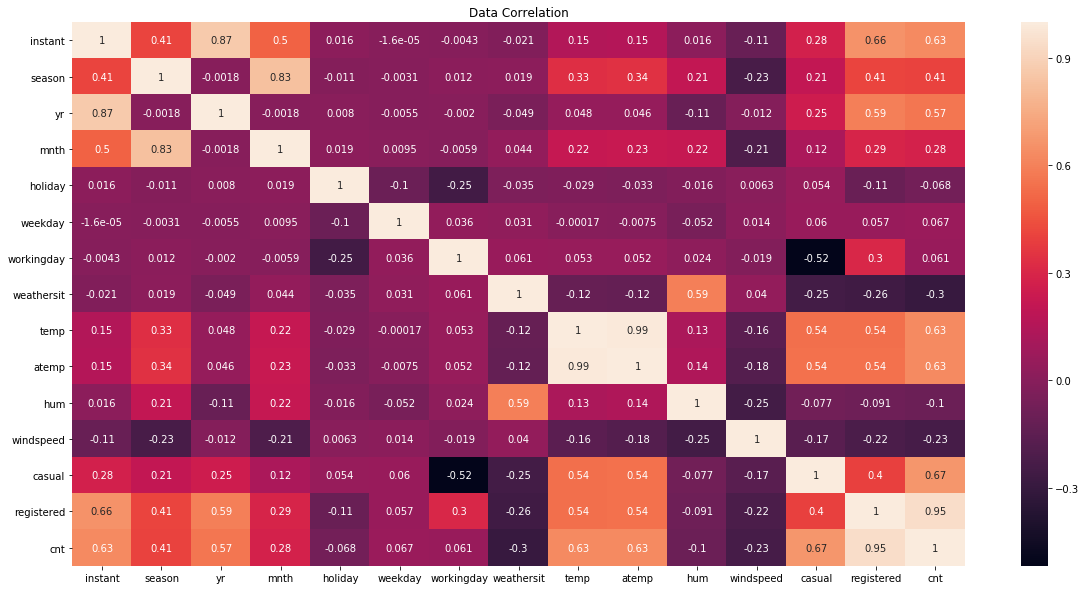

In [6]:
plt.subplots(figsize = (20,10))
plt.title("Data Correlation")
sns.heatmap(daily.corr(), annot = True)

In [7]:
daily = daily.drop(['instant','casual', 'registered','atemp'], axis = 1)
daily.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


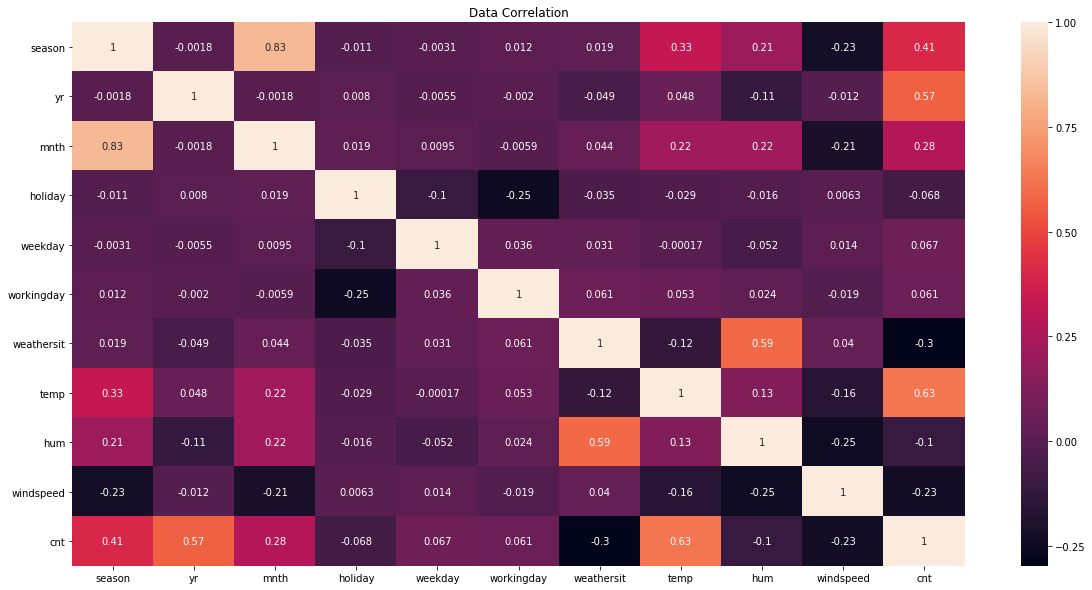

In [8]:
plt.subplots(figsize = (20,10))
plt.title("Data Correlation")
sns.heatmap(daily.corr(), annot = True)

In [9]:
yy = []
for dt in daily['dteday']:
    yy.append('{:%d}'.format(datetime.strptime(dt, '%Y-%m-%d')))

In [10]:
yy = list(map(int, yy))
daily['day'] = yy

In [11]:
daily.info()
print("$" * 40)
daily.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
cnt           731 non-null int64
day           731 non-null int64
dtypes: float64(3), int64(9), object(1)
memory usage: 74.3+ KB
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,day
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985,1
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801,2
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349,3
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562,4
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600,5
5,2011-01-06,1,0,1,0,4,1,1,0.204348,0.518261,0.089565,1606,6
6,2011-01-07,1,0,1,0,5,1,2,0.196522,0.498696,0.168726,1510,7
7,2011-01-08,1,0,1,0,6,0,2,0.165000,0.535833,0.266804,959,8
8,2011-01-09,1,0,1,0,0,0,1,0.138333,0.434167,0.361950,822,9
9,2011-01-10,1,0,1,0,1,1,1,0.150833,0.482917,0.223267,1321,10


In [12]:
daily = daily.drop(['dteday'], axis = 1)
daily.info()
daily.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
cnt           731 non-null int64
day           731 non-null int64
dtypes: float64(3), int64(9)
memory usage: 68.6 KB


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,day
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.627894,0.190486,4504.348837,15.738714
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.142429,0.077498,1937.211452,8.809949
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.000000,0.022392,22.000000,1.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.520000,0.134950,3152.000000,8.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.626667,0.180975,4548.000000,16.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.730209,0.233214,5956.000000,23.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.972500,0.507463,8714.000000,31.000000


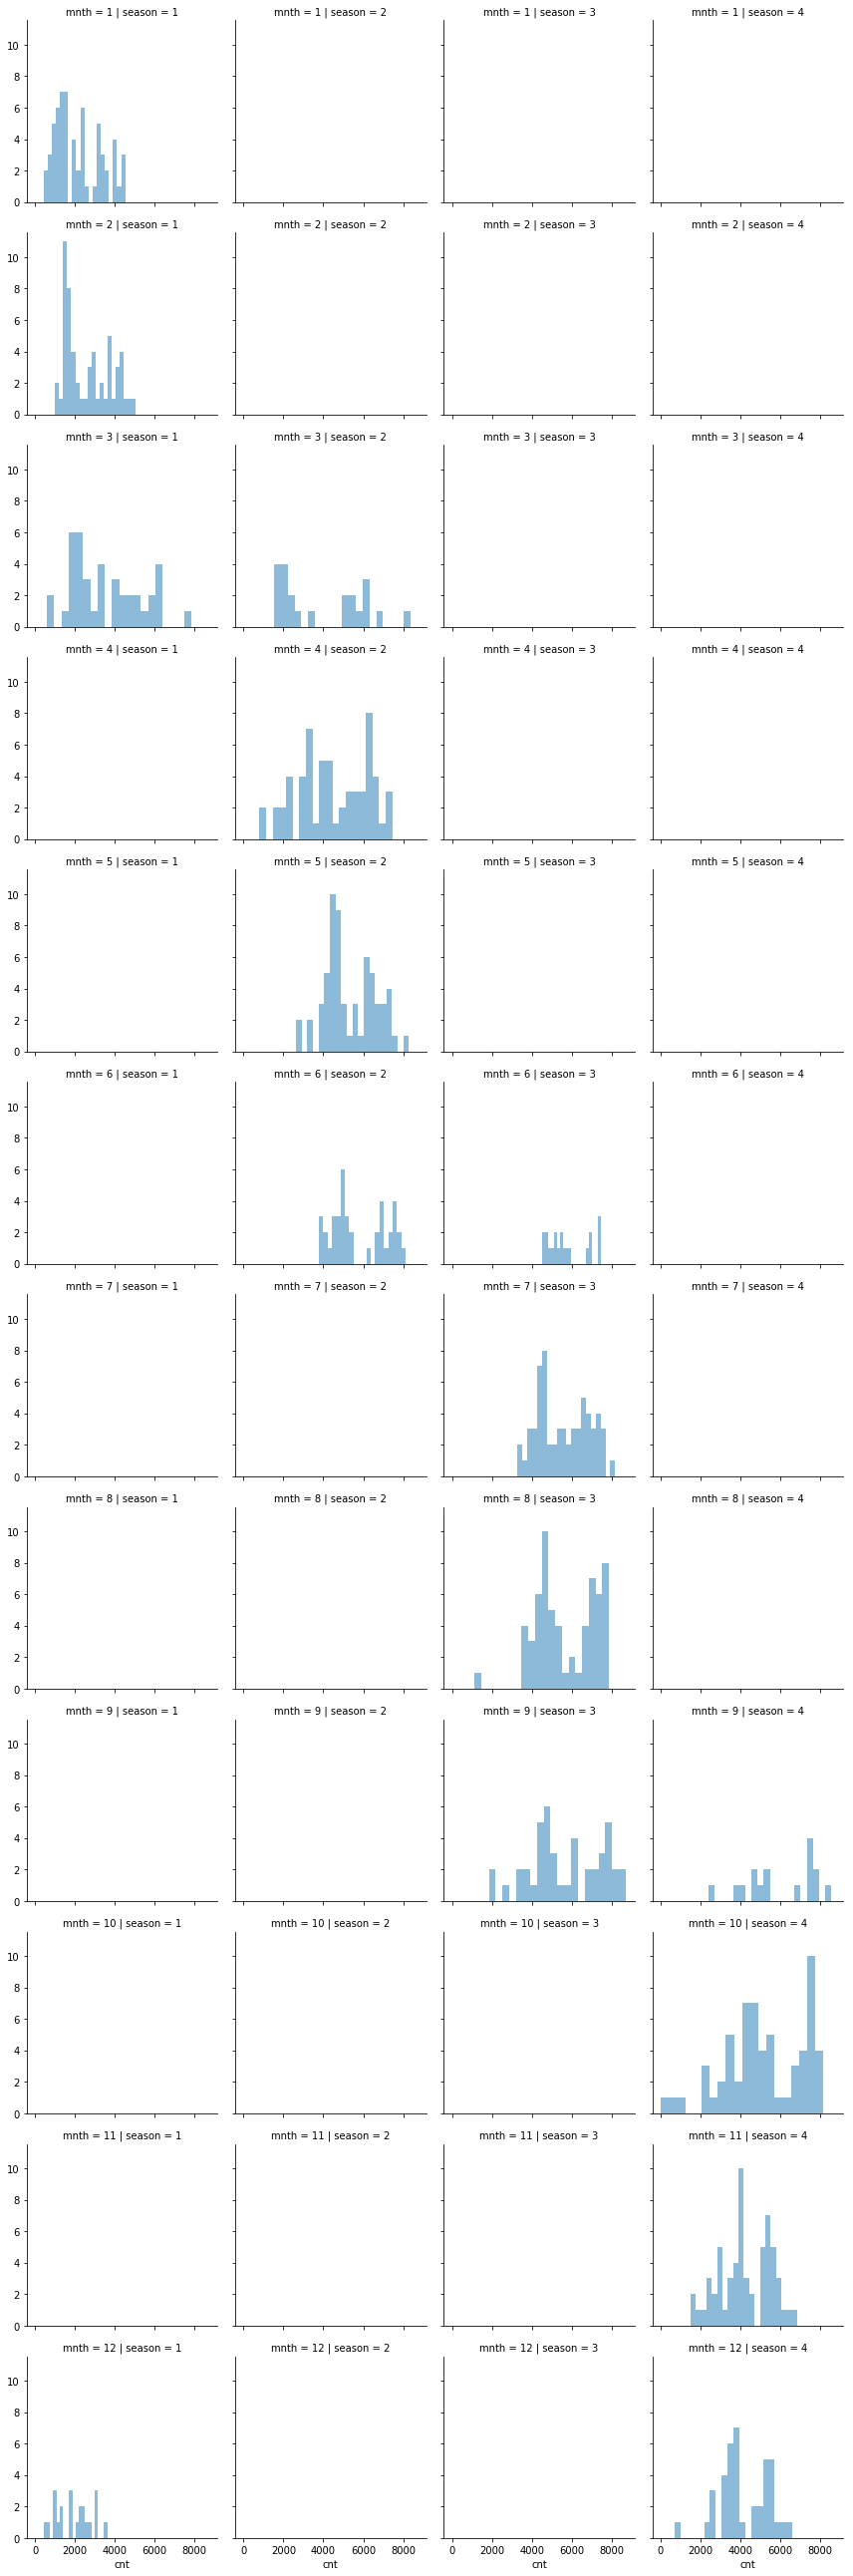

In [13]:
g = sns.FacetGrid(daily, col='season', row = 'mnth')
g.map(plt.hist, 'cnt',  alpha=.5, bins=20)

C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


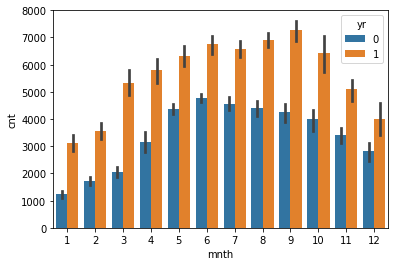

In [14]:
ax = sns.barplot( data = daily, x='mnth', y='cnt', hue = 'yr')

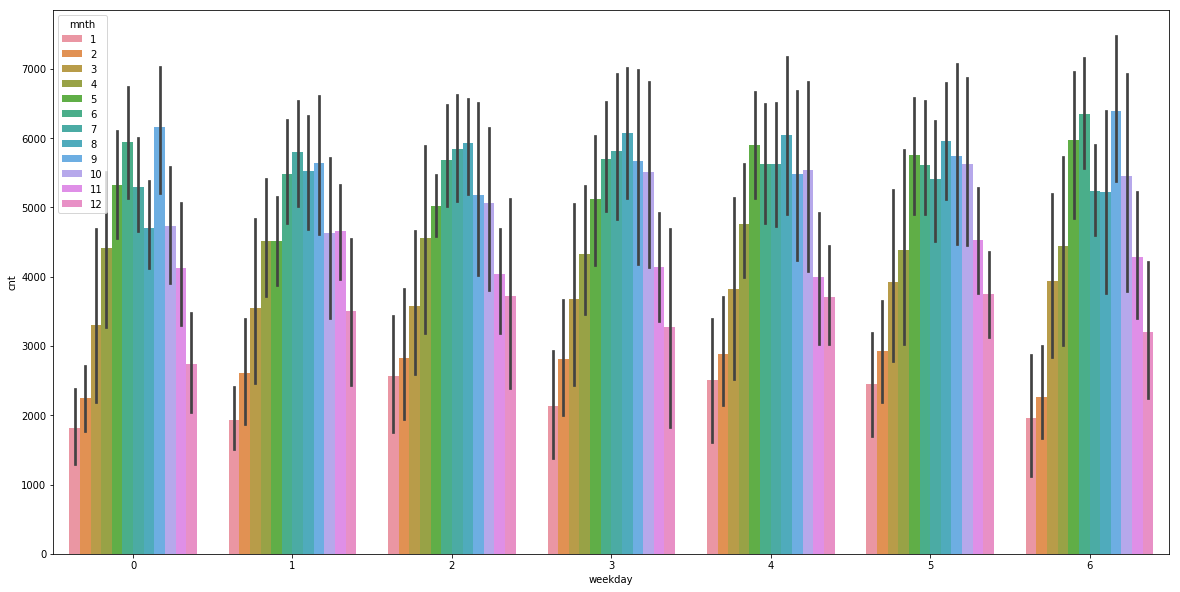

In [15]:
plt.subplots(figsize = (20,10))
ax = sns.barplot( data = daily, x='weekday', y='cnt', hue = 'mnth')

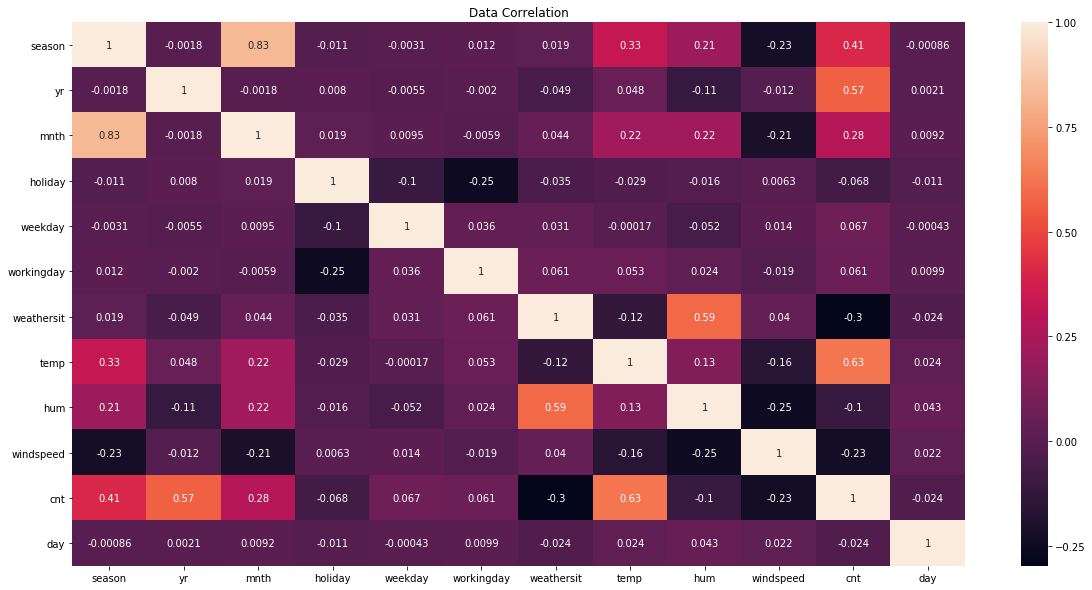

In [16]:
plt.subplots(figsize = (20,10))
plt.title("Data Correlation")
sns.heatmap(daily.corr(), annot = True)

In [17]:
#daily = daily.drop(['season','weekday'], axis = 1)

In [18]:
daily.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,day
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.627894,0.190486,4504.348837,15.738714
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.142429,0.077498,1937.211452,8.809949
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.000000,0.022392,22.000000,1.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.520000,0.134950,3152.000000,8.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.626667,0.180975,4548.000000,16.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.730209,0.233214,5956.000000,23.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.972500,0.507463,8714.000000,31.000000


In [19]:
pd.get_dummies(daily, columns=["day"]).head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
0,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,...,0,0,0,0,0,0,0,0,0,0


In [20]:
daily = pd.concat([daily.drop('day', axis=1), pd.get_dummies(daily['day'])], axis=1)
daily = pd.concat([daily.drop('season', axis=1), pd.get_dummies(daily['season'])], axis=1)
daily = pd.concat([daily.drop('weekday', axis=1), pd.get_dummies(daily['weekday'])], axis=1)
daily = pd.concat([daily.drop('mnth', axis=1), pd.get_dummies(daily['mnth'])], axis=1)
daily = pd.concat([daily.drop('weathersit', axis=1), pd.get_dummies(daily['weathersit'])], axis=1)
daily.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,1,2,3,...,6,7,8,9,10,11,12,1,2,3
0,0,0,0,0.344167,0.805833,0.160446,985,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0.363478,0.696087,0.248539,801,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0.196364,0.437273,0.248309,1349,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0.200000,0.590435,0.160296,1562,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0.226957,0.436957,0.186900,1600,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [21]:
X = daily.iloc[:, daily.columns != 'cnt']
Y = daily.iloc[:, daily.columns == 'cnt']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [22]:
reg = linear_model.LinearRegression() 

reg.fit(X_train, y_train) 
  

print('Coefficients: \n', reg.coef_)

Coefficients: 
 [[ 2.02179199e+03 -3.99896726e+14 -3.99896726e+14  4.30676979e+03
  -1.70748996e+03 -2.67513790e+03 -9.56429619e+14 -9.56429619e+14
  -9.56429619e+14 -9.56429619e+14 -9.56429619e+14 -9.56429619e+14
  -9.56429619e+14 -9.56429619e+14 -9.56429619e+14 -9.56429619e+14
  -9.56429619e+14 -9.56429619e+14 -9.56429619e+14 -9.56429619e+14
  -9.56429619e+14 -9.56429619e+14 -9.56429619e+14 -9.56429619e+14
  -9.56429619e+14 -9.56429619e+14 -9.56429619e+14 -9.56429619e+14
  -9.56429619e+14 -9.56429619e+14 -9.56429619e+14 -9.56429619e+14
  -9.56429619e+14 -9.56429619e+14 -9.56429619e+14 -9.56429619e+14
  -9.56429619e+14 -1.31220180e+15 -1.31220180e+15 -1.31220180e+15
  -1.31220180e+15  1.50114546e+15  1.90104219e+15  1.90104219e+15
   1.90104219e+15  1.90104219e+15  1.90104219e+15  1.50114546e+15
  -5.40349220e+13 -5.40349220e+13 -5.40349220e+13 -5.40349220e+13
  -5.40349220e+13 -5.40349220e+13 -5.40349220e+13 -5.40349220e+13
  -5.40349220e+13 -5.40349220e+13 -5.40349220e+13 -5.4034922

In [23]:
print('Variance score: {}'.format(reg.score(X_test, y_test)))

Variance score: 0.8280273677841016


In [35]:
coeffs_cf = OLS( y_train, X_train).fit().params
print(coeffs_cf)

yr            2027.856037
holiday        188.258657
workingday     646.326297
temp          4311.237033
hum          -1720.515777
windspeed    -2670.025560
1             -232.871134
2               93.847512
3              264.581433
4              314.015444
5              118.012280
6              234.946643
7              -52.920173
8             -275.589806
9              196.875994
10             198.315248
11             266.301990
12             169.296408
13              83.413385
14              46.614849
15             289.763936
16             274.676559
17             366.008235
18              58.421182
19             197.966624
20             262.124745
21             428.317819
22             180.609540
23            -260.051476
24            -230.298120
                 ...     
28            -237.818049
29            -278.517312
30            -276.532839
31             218.549869
1             -131.649400
2              614.902522
3              538.715896
4           

In [37]:
nrm_olscoff =StandardScaler().fit_transform(coeffs_cf.values.reshape(-1, 1))

In [38]:
nrm_olscoff

array([[ 2.22694109e+00],
       [-4.62022451e-02],
       [ 5.19820199e-01],
       [ 5.04845648e+00],
       [-2.40482590e+00],
       [-3.57811080e+00],
       [-5.66581535e-01],
       [-1.62863678e-01],
       [ 4.81078541e-02],
       [ 1.09192194e-01],
       [-1.33003892e-01],
       [ 1.14889030e-02],
       [-3.44220744e-01],
       [-6.19367904e-01],
       [-3.55540229e-02],
       [-3.37755733e-02],
       [ 5.02339014e-02],
       [-6.96334096e-02],
       [-1.75756861e-01],
       [-2.21227868e-01],
       [ 7.92252276e-02],
       [ 6.05821424e-02],
       [ 1.73438354e-01],
       [-2.06639086e-01],
       [-3.42063589e-02],
       [ 4.50721872e-02],
       [ 2.50432710e-01],
       [-5.56540623e-02],
       [-6.00167588e-01],
       [-5.63402128e-01],
       [-4.81628810e-01],
       [-1.77071188e-02],
       [-4.99654983e-01],
       [-5.72694312e-01],
       [-6.22985348e-01],
       [-6.20533186e-01],
       [-8.77217021e-03],
       [-4.41504433e-01],
       [ 4.8